In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Read the House data
data ="Resources/2018-2021 Housing Price.csv"
data_df = pd.read_csv(data, encoding = "utf-8")
data_df

,House,Municipality,Sales 2021,Dollar Volume 2021,Average Price 2021,Median 2021,Total New Listings 2021,Total Active Listings 2021,Sales 2020,Dollar Volume 2020,...,Average Price 2019,Median Price 2019,New Listing 2019,Active Listing 2019,Sale2018,Dollar Volume 2018,Average Price,Median Price,New Listings,Active Listings
0,Detached,Halton Region,5823,9159723655,1573025,1374250.5,7495,3942,5561,6959094187,...,1.280301e+06,936500.0,7958,11928,3819,4092862755,1.071711e+06,913125.0,6753,10757
1,Detached,Peel Region,11276,15591408578,1382707,1264500.0,15597,7917,9564,10561042731,...,1.111766e+06,880000.0,15228,18055,7215,6638950011,9.201594e+05,841250.0,11213,15363
2,Detached,City of Toronto,11534,19809440501,1717482,1392500.0,17284,12288,9709,14335511061,...,1.501784e+06,1036000.0,17972,22374,8098,10645883266,1.314631e+06,1005727.5,12053,16508
3,Detached,York Region,12572,20271320173,1612418,1440550.0,18435,14297,9902,12493394531,...,1.309837e+06,1050875.0,19919,34088,6471,7357297711,1.136965e+06,1037750.0,14958,27725
4,Detached,Durham Region,9900,10191540936,1029449,951000.0,12395,4961,8497,6643964933,...,7.681936e+05,643000.0,13807,16879,6005,3932934116,6.549432e+05,626250.0,9387,12513
5,Semi Detached,Halton Region,657,657971532,1001479,966000.0,812,274,623,499616606,...,8.333591e+05,707375.0,584,458,447,300617188,6.725217e+05,663725.0,598,691
6,Semi Detached,Peel Region,3806,3652939780,959784,922125.0,4799,1719,3316,2684319141,...,8.128374e+05,705500.0,4261,3080,2590,1733470097,6.692935e+05,664500.0,3108,3031
7,Semi Detached,City of Toronto,3919,5090716488,1298984,1179000.0,5300,2632,3051,3549657296,...,1.202444e+06,931450.0,4158,3019,2637,2638606568,1.000609e+06,862500.0,2839,2494
8,Semi Detached,York Region,1488,1607068023,1080019,1053250.0,1912,770,1154,992542670,...,9.229651e+05,783500.0,1632,1605,915,695240389,7.598256e+05,769500.0,1330,1784
9,Semi Detached,Durham Region,959,741344250,773039,753450.0,1133,301,872,524266544,...,5.794051e+05,473125.0,897,671,609,297786390,4.889760e+05,460750.0,639,572


In [11]:
#Create House listing table
listing_df = data_df[['Municipality', 'Total New Listings 2021', 'Total New Listings 2020', 'New Listing 2019', 'New Listings']]

#Rename column
rename_listing_df = listing_df.rename(columns = {'New Listing 2019':'Total New Listings 2019',
                                                'New Listings':'Total New Listings 2018'})

rename_listing_df

,Municipality,Total New Listings 2021,Total New Listings 2020,Total New Listings 2019,Total New Listings 2018
0,Halton Region,7495,8245,7958,6753
1,Peel Region,15597,14446,15228,11213
2,City of Toronto,17284,16661,17972,12053
3,York Region,18435,17329,19919,14958
4,Durham Region,12395,11095,13807,9387
5,Halton Region,812,818,584,598
6,Peel Region,4799,4409,4261,3108
7,City of Toronto,5300,4433,4158,2839
8,York Region,1912,1578,1632,1330
9,Durham Region,1133,1017,897,639


In [23]:
#Group by Municipality, and sum new listing total
group = rename_listing_df.groupby('Municipality')

new_table_df = group.sum()

new_table_df

,Total New Listings 2021,Total New Listings 2020,Total New Listings 2019,Total New Listings 2018
Municipality,,,,
City of Toronto,62585,59347,52377,36606
Durham Region,18037,16006,18331,12489
Halton Region,13831,14421,12753,10726
Peel Region,32733,31325,29444,21562
York Region,30941,28008,29852,23350


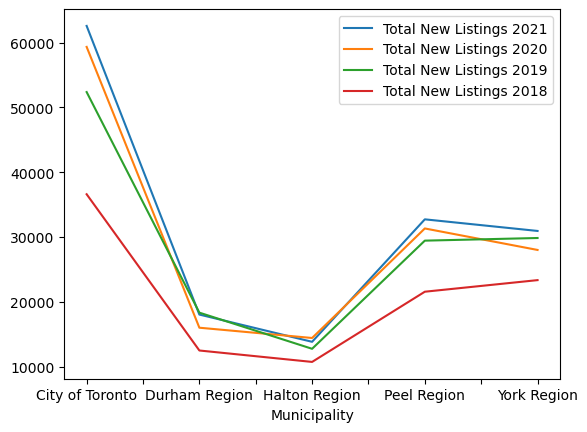

In [25]:
#draw line chart
new_table_df.plot()
plt.show()